# Fashion MNIST - CNN
- 32 Conv2D layer
- 64 Conv2D layer
- MaxPooling2D layer
- Dropout(0.25)
- Flatten
- Fully Connected Network(512) layer
- Dropout(0.5)
- Output(10)

In [ ]:
import numpy as np
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

* 데이터 전처리

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

# keras 데이터의 경우 2개의 튜플로 들어온다
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
fashion_mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

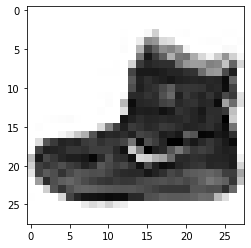

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='Greys');

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

class_names[y_train[0]]

'Ankle boot'

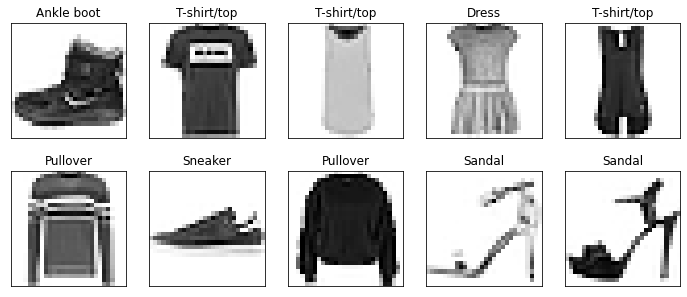

In [ ]:
plt.figure(figsize = (12, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap = 'Greys')
    plt.title(class_names[y_train[i]])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
# X data 정규화 및 차원 변경
X_train = X_train.reshape(-1, 28, 28, 1) / 255
X_test = X_test.reshape(-1, 28, 28, 1) / 255

In [ ]:
# y data : one-hot encoding
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

* 모델 정의, 설정, 학습, 평가

In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
model = Sequential([
                    Conv2D(32, (3, 3), input_shape = (28, 28, 1), activation = 'relu'),
                    Conv2D(64, (3, 3), activation = 'relu'),
                    MaxPooling2D(),
                    Dropout(0.25),
                    Flatten(),
                    Dense(512, activation = 'relu'),
                    Dropout(0.5),
                    Dense(10, activation = 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 512)               4719104   
                                                        

In [ ]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model_path = 'best-fation-mnist-cnn.h5'
checkpoint = ModelCheckpoint(model_path, save_best_only=True, verbose = 1)
early_stop = EarlyStopping(patience = 10)

In [ ]:
hist = model.fit(
    X_train, Y_train, validation_split= 0.2, batch_size = 200, epochs = 100,
    callbacks = [checkpoint, early_stop], verbose = 0
)


Epoch 00001: val_loss improved from inf to 0.32247, saving model to best-fation-mnist-cnn.h5

Epoch 00002: val_loss improved from 0.32247 to 0.27208, saving model to best-fation-mnist-cnn.h5

Epoch 00003: val_loss improved from 0.27208 to 0.24056, saving model to best-fation-mnist-cnn.h5

Epoch 00004: val_loss improved from 0.24056 to 0.23226, saving model to best-fation-mnist-cnn.h5

Epoch 00005: val_loss did not improve from 0.23226

Epoch 00006: val_loss improved from 0.23226 to 0.21250, saving model to best-fation-mnist-cnn.h5

Epoch 00007: val_loss improved from 0.21250 to 0.20271, saving model to best-fation-mnist-cnn.h5

Epoch 00008: val_loss did not improve from 0.20271

Epoch 00009: val_loss improved from 0.20271 to 0.20054, saving model to best-fation-mnist-cnn.h5

Epoch 00010: val_loss did not improve from 0.20054

Epoch 00011: val_loss did not improve from 0.20054

Epoch 00012: val_loss did not improve from 0.20054

Epoch 00013: val_loss did not improve from 0.20054

Epoch

In [ ]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2177 - accuracy: 0.9237


[0.21766139566898346, 0.9236999750137329]

* 학습과정 시각화

In [ ]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

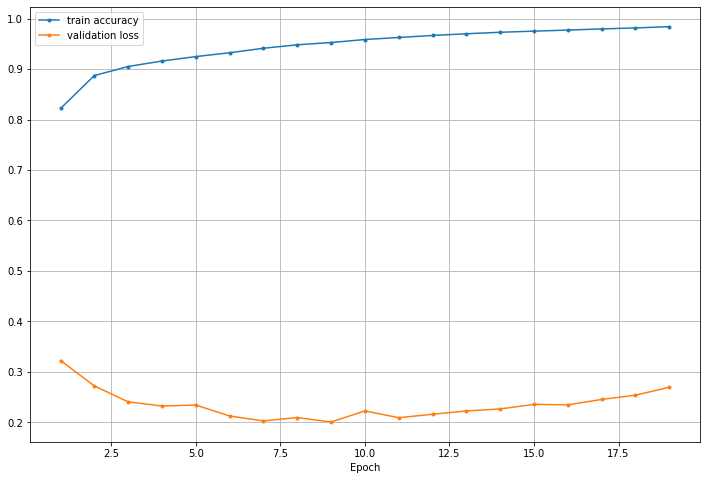

In [ ]:
plt.figure(figsize = (12, 8))
plt.plot(xs, y_acc, 'o-', ms = 3, label = 'train accuracy')
plt.plot(xs, y_vloss, 'o-', ms = 3, label = 'validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()